# Handwritten Digit Classification
## Using Just Numpy!!

This notebook aims implement the core mathematics behind neural networks, by just using Numpy- a module for operations on large multidimensional matrices.

By not using any frameworks such as Tensorflow or Keras, it helped in gaining a deeper understanding of how each node in a neural network operates.

It helped in gain a deeper understanding of Gradient Descent, Forward propagation, and backward propagation.

The challenges faced during implementing each of these functions, solving them by pen and paper, helped in clearing any existing doubts that I had.

Credits to:
- Andrew Ng's Machine Learning Specialization on Coursera
- 3Blue1Brown's Neural Network playlist on Youtube


In [1]:
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/digit-recognizer/sample_submission.csv
/kaggle/input/digit-recognizer/train.csv
/kaggle/input/digit-recognizer/test.csv


### We import the necessary libraries like pandas ans matplotlib for this task apart from numpy
#### Pandas only helps in loading the csv data in to a dataframe, which we will be converting into a numpy array
#### Matplotlib is useful to display the 28x28 pixel values in a grid

In [2]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

data = pd.read_csv('/kaggle/input/digit-recognizer/train.csv')
data.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


#### We convert the dataframe in to a numpy array and shuffle the data before we split into the train and test sets

In [3]:
data = np.array(data)
m, n = data.shape
np.random.shuffle(data) # shuffle before splitting into dev and training sets

#getting the test data set
data_dev = data[0:1000].T
Y_dev = data_dev[0]
X_dev = data_dev[1:n]
X_dev = X_dev / 255.

#getting the train dataset
data_train = data[1000:m].T
Y_train = data_train[0]
X_train = data_train[1:n]
X_train = X_train / 255.
_,m_train = X_train.shape

In [4]:
X_train[:, 0].shape

(784,)

In [5]:
Y_train

array([9, 8, 7, ..., 1, 8, 0])

Our NN will have a simple two-layer architecture. Input layer $a^{[0]}$ will have 784 units for each of the 784 pixels in each 28x28 input image. A hidden layer $a^{[1]}$ will have 10 units with ReLU activation, and finally our output layer $a^{[2]}$ will have 10 units corresponding to the ten digit classes with softmax activation.

**Forward propagation**

$$Z^{[1]} = W^{[1]} X + b^{[1]}$$
$$A^{[1]} = g_{\text{ReLU}}(Z^{[1]}))$$
$$Z^{[2]} = W^{[2]} A^{[1]} + b^{[2]}$$
$$A^{[2]} = g_{\text{softmax}}(Z^{[2]})$$

**Backward propagation**

$$dZ^{[2]} = A^{[2]} - Y$$
$$dW^{[2]} = \frac{1}{m} dZ^{[2]} A^{[1]T}$$
$$dB^{[2]} = \frac{1}{m} \Sigma {dZ^{[2]}}$$
$$dZ^{[1]} = W^{[2]T} dZ^{[2]} .* g^{[1]\prime} (z^{[1]})$$
$$dW^{[1]} = \frac{1}{m} dZ^{[1]} A^{[0]T}$$
$$dB^{[1]} = \frac{1}{m} \Sigma {dZ^{[1]}}$$

**Parameter updates**

$$W^{[2]} := W^{[2]} - \alpha dW^{[2]}$$
$$b^{[2]} := b^{[2]} - \alpha db^{[2]}$$
$$W^{[1]} := W^{[1]} - \alpha dW^{[1]}$$
$$b^{[1]} := b^{[1]} - \alpha db^{[1]}$$

>  Only the Formatting of the above markdown was generated by AI

In [6]:

def init_params():
    #np.random.rand(10, 784) - 0.5: generates 10x784 matrix, consisting of the weights for the 10 neurons for each i/p from input layer
    #we subtract 0.5 to shift activations so that they are centered at 0
    W1 = np.random.rand(10, 784) - 0.5 
    b1 = np.random.rand(10, 1) - 0.5
    W2 = np.random.rand(10, 10) - 0.5
    b2 = np.random.rand(10, 1) - 0.5
    return W1, b1, W2, b2

def ReLU(Z):
    #Defining the activation function to be used for each neuron
    return np.maximum(Z, 0)

def softmax(Z):
    #the function to be used in the output layer n order to convert the activations in to probabilities
    A = np.exp(Z) / sum(np.exp(Z))
    return A
    
def forward_prop(W1, b1, W2, b2, X):
    
    #calculating the activation values for each node in the first and 2nd layers
    Z1 = W1.dot(X) + b1
    A1 = ReLU(Z1)
    Z2 = W2.dot(A1) + b2
    A2 = softmax(Z2)
    return Z1, A1, Z2, A2

def ReLU_deriv(Z):
    return Z > 0

def one_hot(Y):
    
    #we use the one hot encoder in order to convert the target values into a 10 bit binary value, where the position of 1 indicates the value of the number
    one_hot_Y = np.zeros((Y.size, Y.max() + 1))
    one_hot_Y[np.arange(Y.size), Y] = 1
    one_hot_Y = one_hot_Y.T
    return one_hot_Y

def backward_prop(Z1, A1, Z2, A2, W1, W2, X, Y):
    
    #calculating the 
    one_hot_Y = one_hot(Y)
    dZ2 = A2 - one_hot_Y #error at 2nd layer between predicted and actual value
    dW2 = 1 / m * dZ2.dot(A1.T) #gradient of the loss function with respect to 2nd layer weights
    db2 = 1 / m * np.sum(dZ2) #Gradient of the loss function with respect to the second layer bias
    
    dZ1 = W2.T.dot(dZ2) * ReLU_deriv(Z1) #calculating delta of first layer
    dW1 = 1 / m * dZ1.dot(X.T) #finding out the gradient of first layer
    db1 = 1 / m * np.sum(dZ1)
    return dW1, db1, dW2, db2

def update_params(W1, b1, W2, b2, dW1, db1, dW2, db2, alpha):
    W1 = W1 - alpha * dW1
    b1 = b1 - alpha * db1    
    W2 = W2 - alpha * dW2  
    b2 = b2 - alpha * db2    
    return W1, b1, W2, b2

In [7]:
def get_predictions(A2):
    # Get the index of the maximum element in each row of A2 (axis=0), gets the target label
    return np.argmax(A2, 0)

def get_accuracy(predictions, Y):
    print(predictions, Y)
    # Count the number of correctly predicted labels
    correct = np.sum(predictions == Y)
    return correct / Y.size # Calculate and return the accuracy (fraction of correct predictions)

def gradient_descent(X, Y, alpha, iterations):
    W1, b1, W2, b2 = init_params()
    for i in range(iterations):
        Z1, A1, Z2, A2 = forward_prop(W1, b1, W2, b2, X) # Forward propagation: calculate activations for each layer
        dW1, db1, dW2, db2 = backward_prop(Z1, A1, Z2, A2, W1, W2, X, Y) # Backpropagation: calculate gradients
        W1, b1, W2, b2 = update_params(W1, b1, W2, b2, dW1, db1, dW2, db2, alpha) # Update weights and biases using learning rate
        if i % 10 == 0:
            print("Iteration: ", i)
            predictions = get_predictions(A2)
            print(get_accuracy(predictions, Y))
    return W1, b1, W2, b2

In [8]:
W1, b1, W2, b2 = gradient_descent(X_train, Y_train, 0.80, 500)

Iteration:  0
[6 3 0 ... 3 6 6] [9 8 7 ... 1 8 0]
0.1197560975609756
Iteration:  10
[4 9 7 ... 7 6 0] [9 8 7 ... 1 8 0]
0.33495121951219514
Iteration:  20
[4 1 1 ... 1 6 1] [9 8 7 ... 1 8 0]
0.3405609756097561
Iteration:  30
[9 8 7 ... 1 9 5] [9 8 7 ... 1 8 0]
0.5552926829268293
Iteration:  40
[4 3 7 ... 1 8 5] [9 8 7 ... 1 8 0]
0.6910975609756097
Iteration:  50
[4 8 7 ... 1 8 0] [9 8 7 ... 1 8 0]
0.6886585365853658
Iteration:  60
[4 3 7 ... 1 8 3] [9 8 7 ... 1 8 0]
0.7561219512195122
Iteration:  70
[4 3 7 ... 1 8 3] [9 8 7 ... 1 8 0]
0.7891707317073171
Iteration:  80
[9 3 7 ... 1 8 3] [9 8 7 ... 1 8 0]
0.8017560975609757
Iteration:  90
[9 3 7 ... 1 8 3] [9 8 7 ... 1 8 0]
0.8221219512195121
Iteration:  100
[4 3 7 ... 1 8 3] [9 8 7 ... 1 8 0]
0.809
Iteration:  110
[4 8 7 ... 1 8 5] [9 8 7 ... 1 8 0]
0.855
Iteration:  120
[4 8 7 ... 1 8 5] [9 8 7 ... 1 8 0]
0.8572682926829268
Iteration:  130
[4 8 7 ... 1 8 0] [9 8 7 ... 1 8 0]
0.8618780487804878
Iteration:  140
[4 8 7 ... 1 8 5] [9 8 7 .

In [9]:
def make_predictions(X, W1, b1, W2, b2):
    # Get the predicted labels using the final activations
    _, _, _, A2 = forward_prop(W1, b1, W2, b2, X)
    predictions = get_predictions(A2)
    return predictions

def test_prediction(index, W1, b1, W2, b2):
    # Extract the image at the specified index from the training data
    current_image = X_train[:, index, None]
    prediction = make_predictions(X_train[:, index, None], W1, b1, W2, b2) #make the prediction on the data
    label = Y_train[index]
    print("Prediction: ", prediction)
    print("Label: ", label)
    
    #configuring plot to display the image
    current_image = current_image.reshape((28, 28)) * 255
    plt.gray()
    plt.imshow(current_image, interpolation='nearest')
    plt.show()

Prediction:  [9]
Label:  9


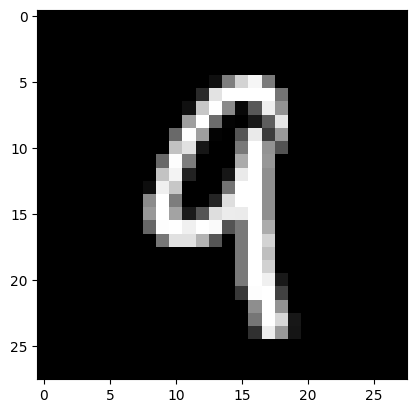

Prediction:  [8]
Label:  8


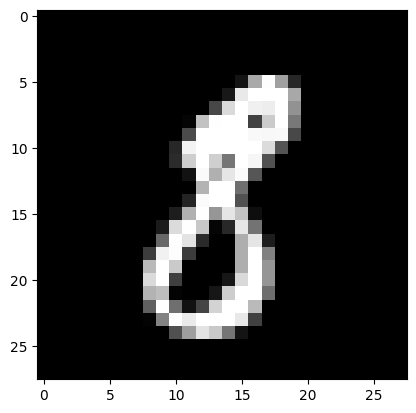

Prediction:  [7]
Label:  7


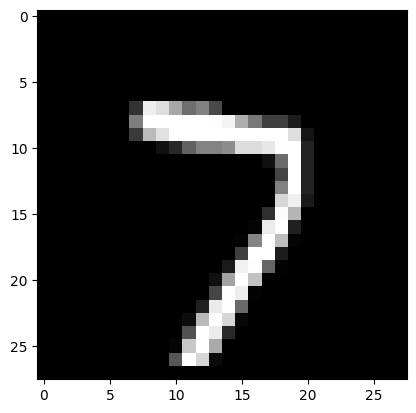

Prediction:  [6]
Label:  6


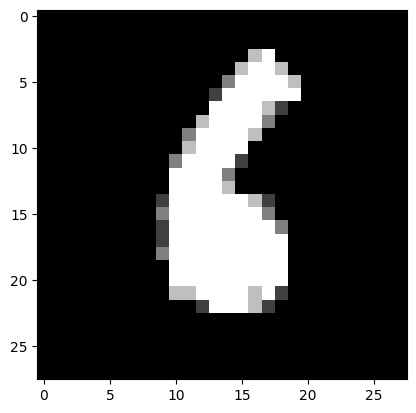

In [10]:
test_prediction(0, W1, b1, W2, b2)
test_prediction(1, W1, b1, W2, b2)
test_prediction(2, W1, b1, W2, b2)
test_prediction(3, W1, b1, W2, b2)

In [11]:
dev_predictions = make_predictions(X_dev, W1, b1, W2, b2)
print("We get accuracy of: ",get_accuracy(dev_predictions, Y_dev)*100)

[5 0 6 7 6 5 2 1 6 6 1 3 4 6 9 4 8 8 7 9 5 7 7 1 7 1 0 8 7 5 4 7 6 5 8 4 2
 5 8 9 1 6 7 6 0 4 2 6 4 6 3 1 7 3 0 1 9 9 1 2 2 3 1 1 6 0 1 1 4 9 4 7 8 5
 3 2 1 6 9 0 4 1 1 6 6 8 1 6 3 7 7 0 1 6 2 1 6 1 1 4 6 4 1 9 8 5 6 9 1 8 5
 2 2 7 9 5 7 3 4 1 2 6 4 6 1 2 4 3 8 2 7 2 9 7 5 2 2 0 4 1 8 0 3 0 1 0 2 7
 6 9 4 8 0 7 6 8 8 0 1 2 5 1 8 6 4 1 3 5 8 3 3 2 5 0 4 3 8 4 2 2 7 8 9 9 7
 7 2 5 4 8 9 3 7 6 9 2 8 9 6 2 8 0 6 5 6 8 6 0 0 4 4 6 9 9 4 2 5 3 7 9 7 3
 1 1 3 4 3 5 2 0 1 9 6 6 6 9 3 1 2 4 0 3 0 3 5 6 1 4 5 3 5 6 5 9 2 8 2 6 2
 3 6 0 8 5 0 8 6 6 8 8 5 1 7 5 6 0 1 3 3 1 7 0 1 3 9 8 6 0 8 6 5 3 3 2 8 4
 8 2 1 6 7 6 0 0 6 8 5 9 7 9 5 3 3 2 9 8 9 5 7 7 5 8 9 9 8 7 9 4 1 8 0 8 4
 8 2 7 7 7 3 7 6 7 2 8 9 4 7 0 8 2 9 4 7 3 5 3 9 5 7 9 3 2 7 4 1 9 1 0 7 9
 6 2 4 0 9 5 2 4 8 9 7 1 5 6 1 7 9 9 9 9 9 9 6 2 6 6 4 0 3 0 0 4 3 1 9 0 7
 7 1 1 9 2 8 4 7 9 8 7 1 1 9 7 5 7 6 4 8 3 9 4 1 8 9 3 8 2 3 0 5 4 7 0 6 5
 5 4 4 4 4 1 0 6 1 8 3 7 9 7 6 1 5 6 0 3 6 0 7 5 6 2 0 7 6 9 1 8 1 4 4 2 7
 8 8 6 8 6 9 9 5 7 1 3 4 